In [1076]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [1077]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1078]:
df = pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Exploratory Data Analysis

In [1079]:
df.shape

(1727, 7)

In [1080]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

# Rename column names
we can see that the dataset does not have proper column names. so, we should give proper names to the columns. as follow,

In [1081]:
df.columns = ['buying','maint','doors','persons','lug_boot','safety','class']

In [1082]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [1083]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


view the summary of dataset

In [1084]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Frequency distribution of values in variables
Now, I will check the frequency counts of categorical variables.

In [1085]:
df.columns
for i in df.columns:
    print(df[i].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

# Summary of variables
1. There are 7 variables in the dataset. All the variables are    of categorical data type.
2. These are given by buying, maint, doors, persons, lug_boot,    safety and class.
3. class is the target variable.

# Explore 'class' variable

In [1086]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

The class target variable is ordinal in nature.

# find missing values in variales

In [1087]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# Declare feature and target variable 

In [1088]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [1089]:
x = df.drop(['class'],axis=1)
y = df['class']

# Split data into training and test set

In [1090]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)

Here,
stratify=y is a parameter used in some programming contexts, especially in machine learning or data analysis, to ensure that the splitting of data maintains the same proportion of categories or classes as the original dataset.

For example, if you have a dataset with two categories, such as "yes" and "no," the stratify=y parameter will ensure that when you split the data into training and testing sets, both the training and testing sets will have a similar proportion of "yes" and "no" instances as the original dataset. This helps in maintaining the balance of classes in both subsets, which is particularly important in classification problems to prevent biases in the model's learning process.

In [1091]:
x_test.shape, x_train.shape

((519, 6), (1208, 6))

# Feature Engineering
We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

First, I will check the data types of variables again.

In [1092]:
# check data type in x_train

x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

 Encode categorical variables

In [1093]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
714,high,med,4,4,med,med
320,vhigh,med,5more,more,big,low
1442,low,high,3,4,med,low
1603,low,med,5more,4,small,high
565,high,high,2,more,big,high


We can see that all the variables are ordinal categorical data type.

In [1094]:
# import category encoders 

import category_encoders as ce

In [1095]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)


In [1096]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
714,1,1,1,1,1,1
320,2,1,2,2,2,2
1442,3,2,3,1,1,2
1603,3,1,2,1,3,3
565,1,2,4,2,2,3


In [1097]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
1348,3,3,3,2,2,3
1142,4,1,1,1,3,2
1213,4,4,4,2,2,3
1224,4,4,3,1,3,1
768,1,4,4,1,1,1


Now we have training and test set ready for model building.

# Random Forest Classifier model with 10 decision trees

In [1098]:
# import random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

RFC = RandomForestClassifier(n_estimators=10,random_state=0)

# fit the model 
RFC.fit(x_train,y_train)

#predict the test set results
y_pred = RFC.predict(x_test)

#chech accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {:.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score with 10 decision-trees : 0.9595


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

# Random Forest Classifier model with parameter n_estimators=100

In [1099]:
# instantiate the classifier with n_estimators = 100
RFC_100 = RandomForestClassifier(n_estimators = 100,random_state=0)
    
#fit the model to the training set
RFC_100.fit(x_train,y_train)

# predict on the test set resluts
y_pred_100 = RFC_100.predict(x_test)

#check the model accuracy_score
from sklearn.metrics import accuracy_score
print('Model accuracy_score with 100 decision_trees : {:.4f}'.format(accuracy_score(y_test,y_pred_100)))

Model accuracy_score with 100 decision_trees : 0.9730


# Find important features with Random Forest model

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

First, I will create the Random Forest model as follows:-

In [1100]:
#create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators = 100,random_state=0)

#fit the model to the training set
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [1101]:
# view the feature importances scores

feature_score = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending = False)

feature_score

safety      0.276240
persons     0.226310
maint       0.190889
buying      0.138726
lug_boot    0.093743
doors       0.074091
dtype: float64

We can see that the most important feature is safety and least important feature is doors.

# Visualize feature scores of the features

Now, I will visualize the feature scores with matplotlib and seaborn.

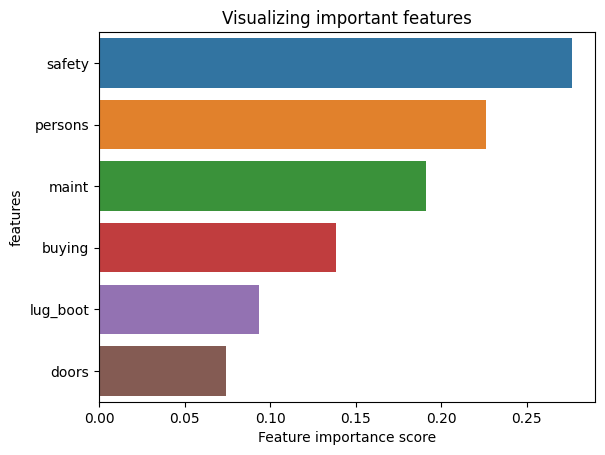

In [1102]:
# creating a seaborn bar plot

sns.barplot(x=feature_score, y =feature_score.index)

# Add labels to the graph
plt.xlabel('Feature importance score')
plt.ylabel('features')

#Add title to the graph
plt.title('Visualizing important features')

#visualize the graph
plt.show()

# Build Random Forest model on selected features 

Now, I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.

In [1103]:
# declare feature vector and target variable

x = df.drop(['class','doors'],axis=1)
y = df['class']

In [1104]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)

Now, I will build the random forest model and check accuracy.

In [1105]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols= ['buying', 'maint', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [1106]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0,n_estimators=100)

#fit the model to the training set
clf.fit(x_train,y_train)

#predict on the test set results
y_pred = clf.predict(x_test)

# check the accuracy_score
print('Model accuracy score without doors variable : {:.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score without doors variable : 0.9538


here we can see that the model accuracy score without doors variable is decreased.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [1107]:
# print the confusion matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

print('confusion matrix\n\n',cm)

confusion matrix

 [[106   0   8   1]
 [  1  18   0   2]
 [ 10   0 353   0]
 [  1   1   0  18]]


# Classification report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. 

In [1108]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.90      0.92      0.91       115
        good       0.95      0.86      0.90        21
       unacc       0.98      0.97      0.98       363
       vgood       0.86      0.90      0.88        20

    accuracy                           0.95       519
   macro avg       0.92      0.91      0.92       519
weighted avg       0.95      0.95      0.95       519



# Result and Conclusion

1. In this project, I build a Random Forest Classifier to        predict the safety of the car. I build two models, one with    10 decision-trees and another one with 100 decision-trees.
2. The model accuracy score with 10 decision-trees is 0.9595      but the same with 100 decision-trees is 0.9730. So, as        expected accuracy increases with number of decision-trees      in the model.
3. I have used the Random Forest model to find only the          important features, build the model using these features      and saw its effect on accuracy. The most important feature    is safety and least important feature is doors and second
   least importand feature is lug_boot.
4. I have dropped the doors variable and checked the accuracy 
   score and it decreased little bit. 
5. Confusion matrix and classification report are another tool    to visualize the model performance. They yield good            performance.